# Import

In [6]:
from PIL import Image

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from script.tool import *

# Initial

In [7]:
n_cv = 5 
path_dataset = '/home/music/Desktop/measure_model/data/product'
device = torch.device("cuda:0")

In [8]:
df = scan_directory(path_dataset)
df_pd, index_less_than_n, index_greater_than_or_equal_to_n = filter_data(df, minimum_data_class=n_cv)
img_path_greater = df_pd['path_img'][index_greater_than_or_equal_to_n]
img_path_less = df_pd['path_img'][index_less_than_n]

amount of all image : 15524
amount of image that less than 5 in that class : 116
amount of image that more than 5 in that class : 15408


In [9]:
list_data = [10,20,30,40,50]

# Vit

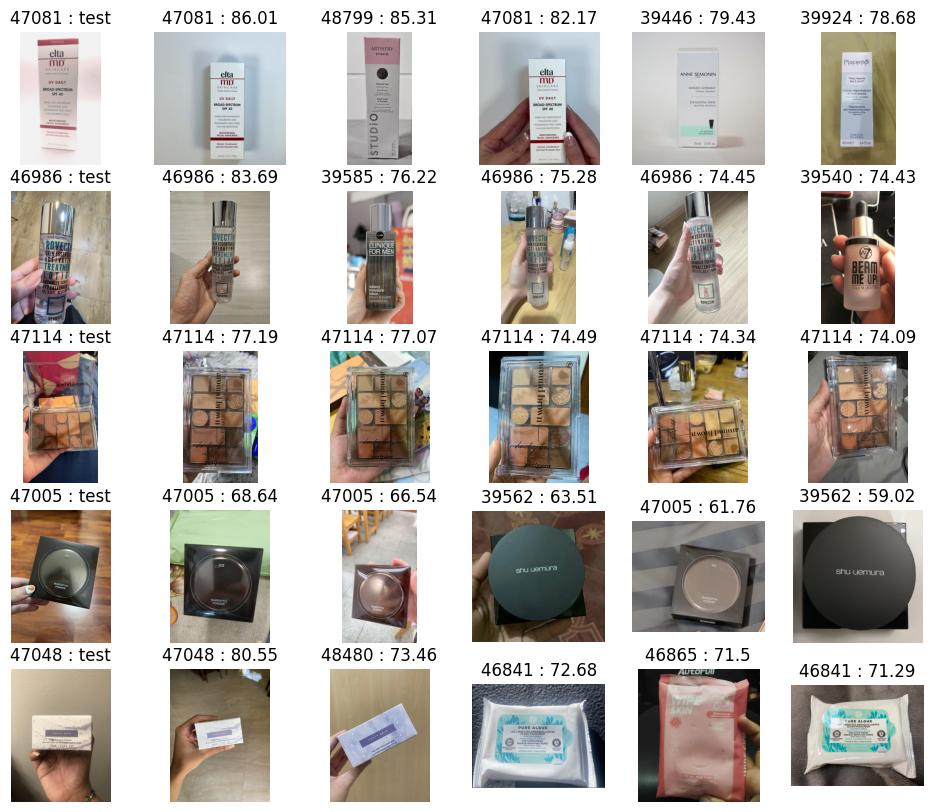

scores 5 fold : [0.6314081765087606, 0.6314081765087606, 0.6262167423750811, 0.6205777345017851, 0.6254462836741318]
average score : 0.6270114227137038


In [46]:
x_gg, y_gg = load_feature("vit_base_patch16_224_in21k_last_hidden_state.csv")
y_gg_label_encode, _ = pd.factorize(y_gg)
result_gg, ls_gg, res_t_gg = StratifiedKFold_score(x_gg, 
                                                   y_gg_label_encode, 
                                                   n_cv=n_cv, 
                                                   index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_gg, res_t_gg, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_gg}")
print(f"average score : {sum(result_gg)/n_cv}")

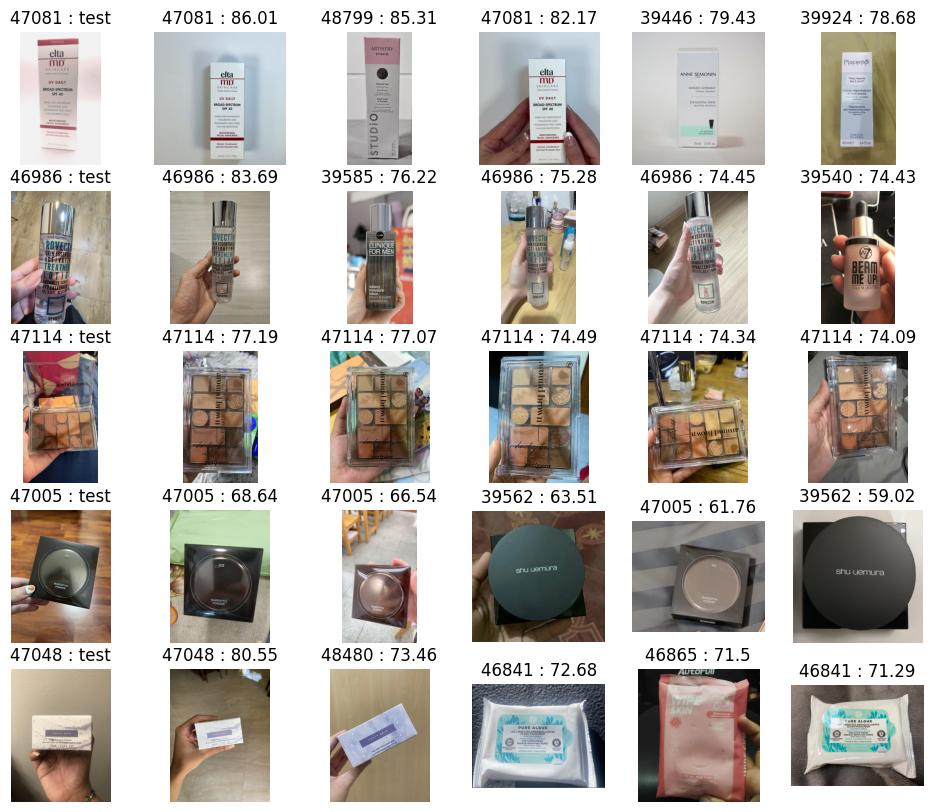

scores 5 fold : [0.6314081765087606, 0.6314081765087606, 0.6262167423750811, 0.6205777345017851, 0.6254462836741318]
average score : 0.6270114227137038


In [5]:
x_gg_onnx, y_gg_onnx = load_feature("vit_base_patch16_224_in21k_last_hidden_state_onnx.csv")
y_gg_onnx_label_encode, _ = pd.factorize(y_gg_onnx)
result_gg_onnx, ls_gg_onnx, res_t_gg_onnx = StratifiedKFold_score(x_gg_onnx, 
                                                      y_gg_onnx_label_encode, 
                                                      n_cv=n_cv, 
                                                      index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_gg_onnx, res_t_gg_onnx, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_gg_onnx}")
print(f"average score : {sum(result_gg_onnx)/n_cv}")

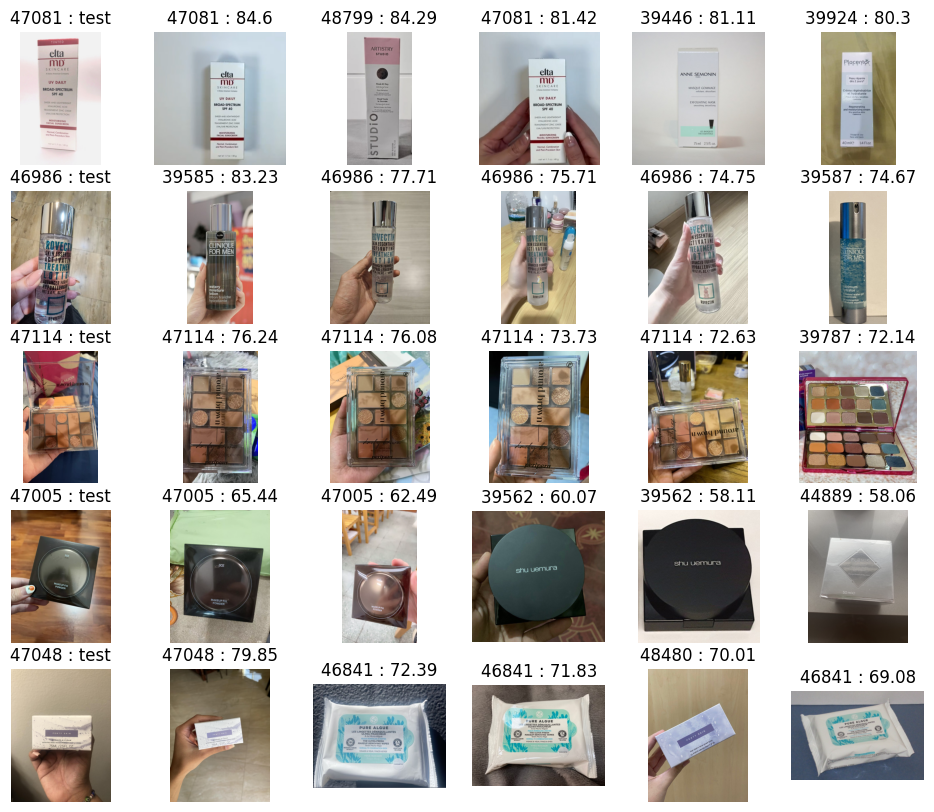

scores 5 fold : [0.627514600908501, 0.6288124594419209, 0.618429591174562, 0.6092177864329763, 0.6199285946121389]
average score : 0.6207806065140198


In [5]:
x_gg_onnx_quantized, y_gg_onnx_quantized = load_feature("vit_base_patch16_224_in21k_last_hidden_state_onnx_quantized.csv")
y_gg_onnx_quantized_label_encode, _ = pd.factorize(y_gg_onnx_quantized)
result_gg_onnx_quantized, ls_gg_onnx_quantized, res_t_gg_onnx_quantized = StratifiedKFold_score(x_gg_onnx_quantized, 
                                                      y_gg_onnx_quantized_label_encode, 
                                                      n_cv=n_cv, 
                                                      index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_gg_onnx_quantized, res_t_gg_onnx_quantized, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_gg_onnx_quantized}")
print(f"average score : {sum(result_gg_onnx_quantized)/n_cv}")

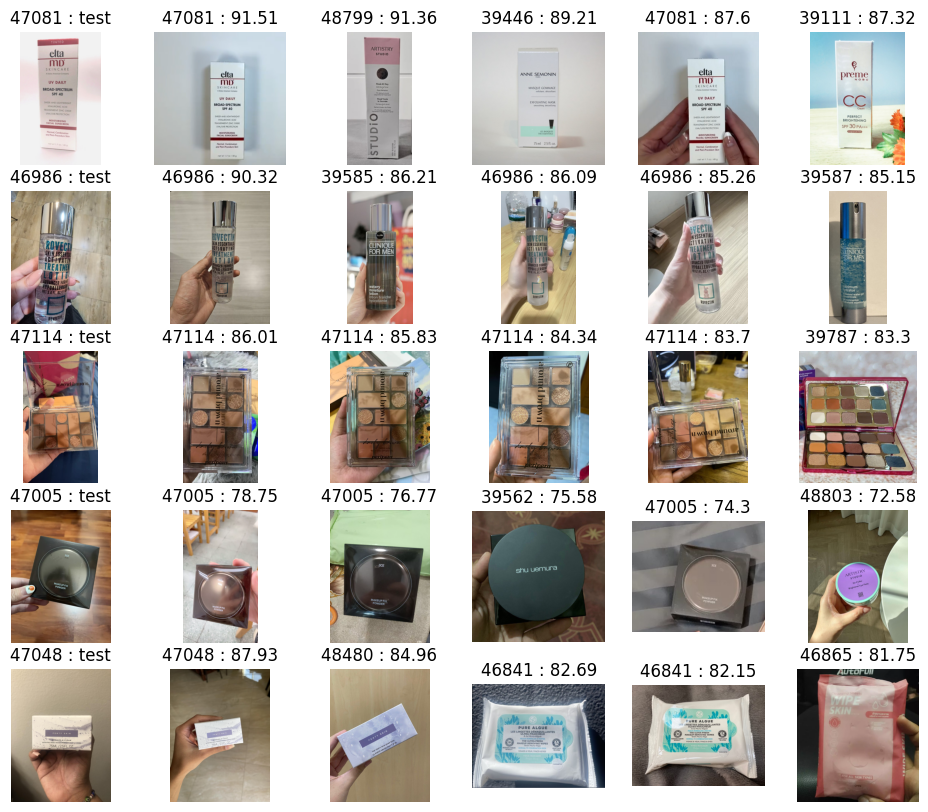

scores 5 fold : [0.6135626216742375, 0.6203763789746918, 0.6145360155743024, 0.6066212268743915, 0.6127880558260305]
average score : 0.6270114227137038


In [47]:
x_gg_pooler_output, y_gg_pooler_output = load_feature("vit_base_patch16_224_in21k_pooler_output.csv")
y_gg_pooler_output_label_encode, _ = pd.factorize(y_gg_pooler_output)
result_gg_pooler_output, ls_gg_pooler_output, res_t_gg_pooler_output = StratifiedKFold_score(x_gg_pooler_output, 
                                                                                             y_gg_pooler_output_label_encode, 
                                                                                             n_cv=n_cv, 
                                                                                             index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_gg_pooler_output, res_t_gg_pooler_output, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_gg_pooler_output}")
print(f"average score : {sum(result_gg_pooler_output)/n_cv}")

# Efficientnet

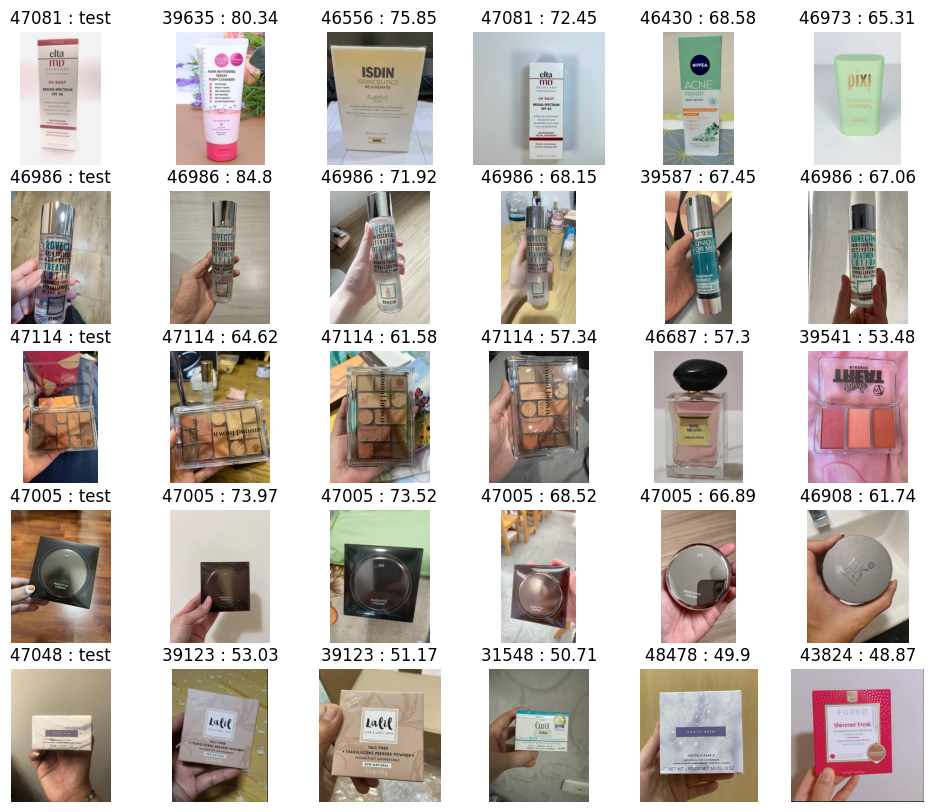

scores 5 fold : [0.6992212848799481, 0.7086307592472421, 0.7034393251135627, 0.6864654333008764, 0.7069133398247323]
average score : 0.7009340284732722


In [5]:
x_eff_b1, y_eff_b1 = load_feature("efficientnet_b1.csv")
y_eff_b1_label_encode, _ = pd.factorize(y_eff_b1)
result_eff_b1, ls_eff_b1, res_t_eff_b1 = StratifiedKFold_score(x_eff_b1, 
                                                      y_eff_b1_label_encode, 
                                                      n_cv=n_cv, 
                                                      index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_eff_b1, res_t_eff_b1, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_eff_b1}")
print(f"average score : {sum(result_eff_b1)/n_cv}")

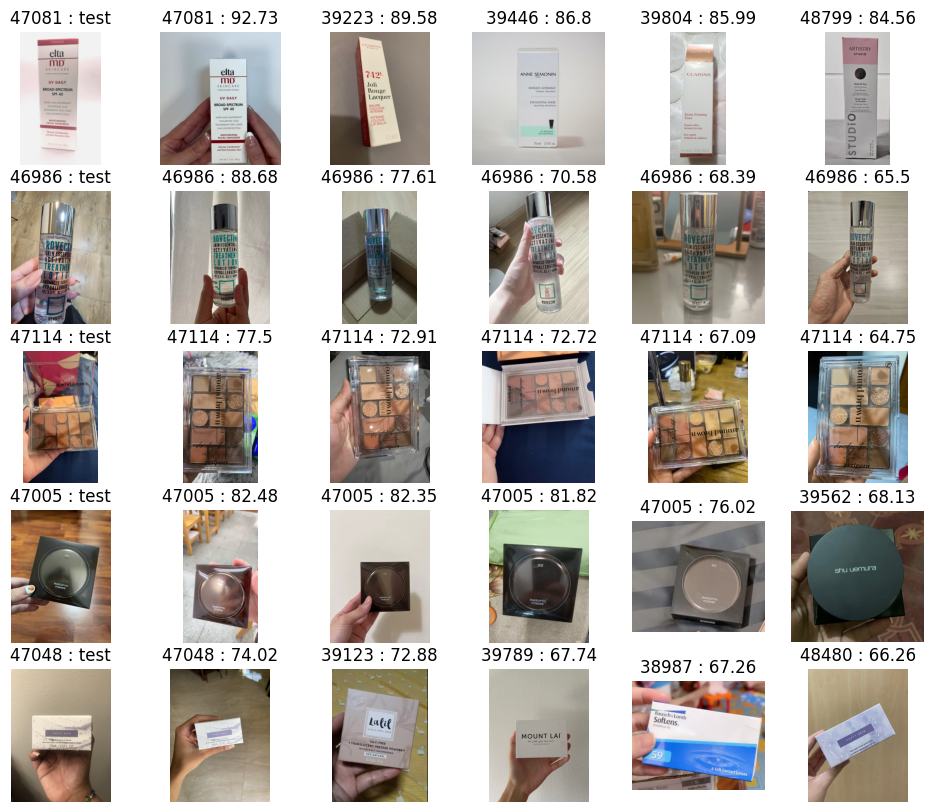

scores 5 fold : [0.8001297858533419, 0.8066190785204412, 0.8049967553536664, 0.7880558260305096, 0.80688088283025]
average score : 0.8013364657176419


In [6]:
x_eff_b5, y_eff_b5 = load_feature("efficientnet_b5.csv")
y_eff_b5_label_encode, _ = pd.factorize(y_eff_b5)
result_eff_b5, ls_eff_b5, res_t_eff_b5 = StratifiedKFold_score(x_eff_b5, 
                                                      y_eff_b5_label_encode, 
                                                      n_cv=n_cv, 
                                                      index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_eff_b5, res_t_eff_b5, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_eff_b5}")
print(f"average score : {sum(result_eff_b5)/n_cv}")

# Efficientformer

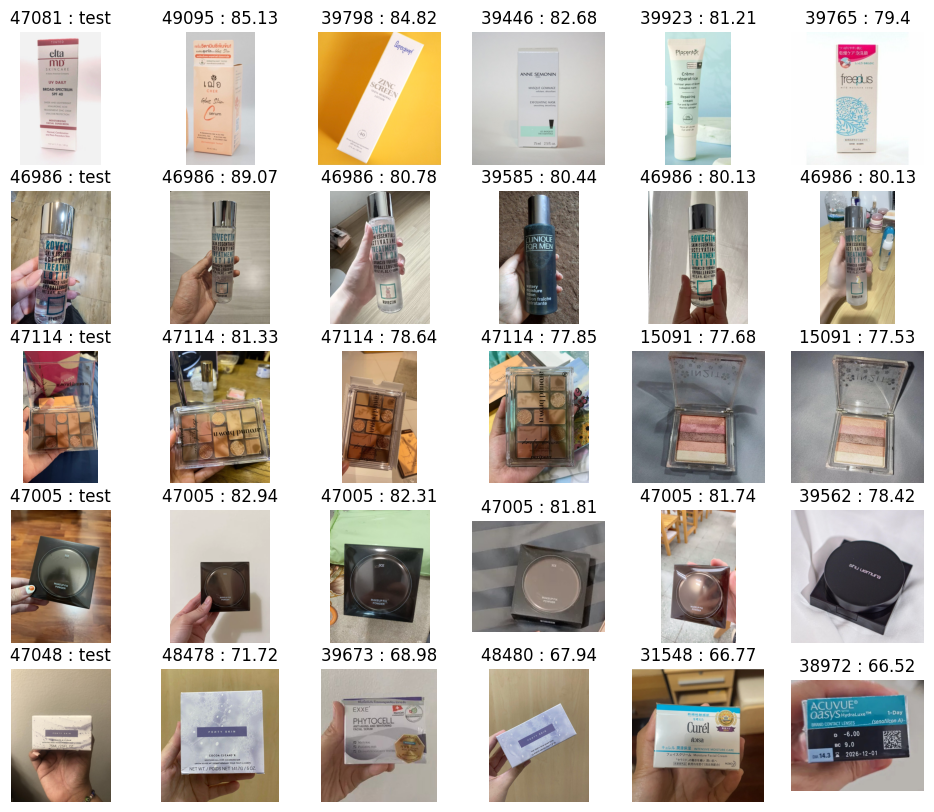

scores 5 fold : [0.6372485399091499, 0.6395197923426347, 0.6466580142764439, 0.6254462836741318, 0.6429730606945797]
average score : 0.638369138179388


In [10]:
x_effformer_l1, y_effformer_l1 = load_feature("efficientformer_l1.csv")
y_effformer_l1_label_encode, _ = pd.factorize(y_effformer_l1)
result_effformer_l1, ls_effformer_l1, res_t_effformer_l1 = StratifiedKFold_score(x_effformer_l1, 
                                                      y_effformer_l1_label_encode, 
                                                      n_cv=n_cv, 
                                                      index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_effformer_l1, res_t_effformer_l1, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_effformer_l1}")
print(f"average score : {sum(result_effformer_l1)/n_cv}")

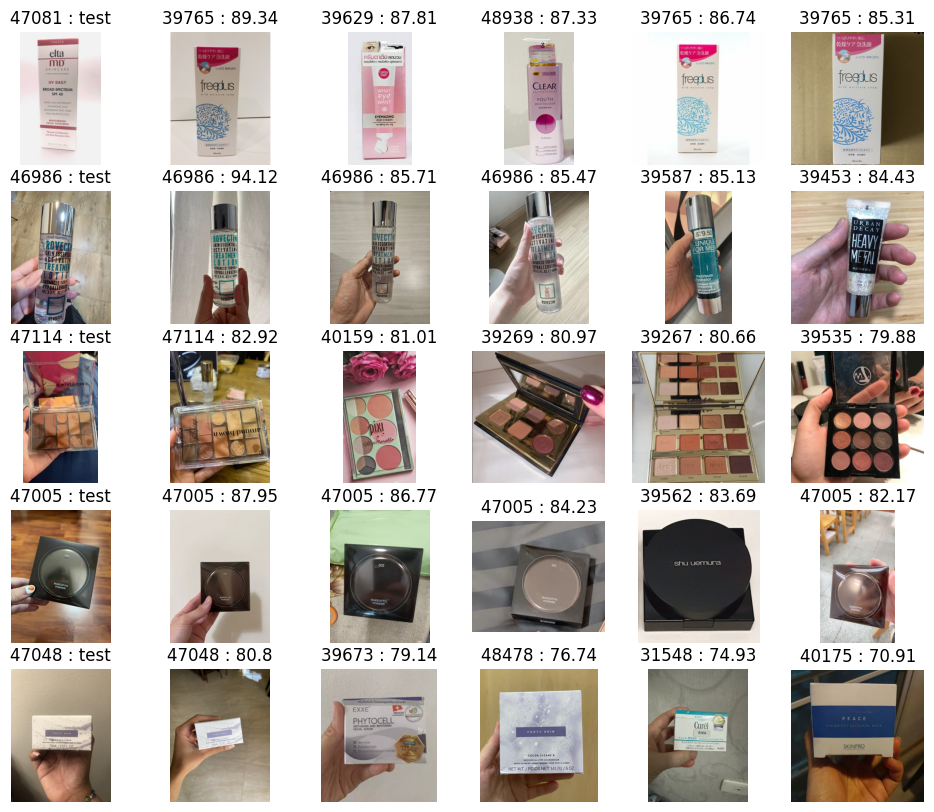

scores 5 fold : [0.6661258922777418, 0.6755353666450357, 0.672939649578196, 0.6488153197013956, 0.6731580655631288]
average score : 0.6673148587530996


In [11]:
x_effformer_l3, y_effformer_l3 = load_feature("efficientformer_l3.csv")
y_effformer_l3_label_encode, _ = pd.factorize(y_effformer_l3)
result_effformer_l3, ls_effformer_l3, res_t_effformer_l3 = StratifiedKFold_score(x_effformer_l3, 
                                                      y_effformer_l3_label_encode, 
                                                      n_cv=n_cv, 
                                                      index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_effformer_l3, res_t_effformer_l3, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_effformer_l3}")
print(f"average score : {sum(result_effformer_l3)/n_cv}")

In [12]:
x_effformerv2_l, y_effformerv2_l = load_feature("efficientformerv2_l.csv")
y_effformerv2_l_label_encode, _ = pd.factorize(y_effformerv2_l)
result_effformerv2_l, ls_effformerv2_l, res_t_effformerv2_l = StratifiedKFold_score(x_effformerv2_l, 
                                                      y_effformerv2_l_label_encode, 
                                                      n_cv=n_cv, 
                                                      index_filter=(index_greater_than_or_equal_to_n, index_less_than_n))
plot_image(list_data, img_path_greater, ls_effformerv2_l, res_t_effformerv2_l, columns=n_cv+1, add_row=img_path_less)
print(f"scores {n_cv} fold : {result_effformerv2_l}")
print(f"average score : {sum(result_effformerv2_l)/n_cv}")

scores 5 fold : [0.6294613887086308, 0.6486048020765737, 0.6375730045425049, 0.6407010710808179, 0.6410256410256411]
average score : 0.6394731814868335
